In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

In [2]:
data = pd.read_csv('../input/temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')

In [3]:
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

# Preprocessing

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Remove the standard deviation examples
    df = df.query("Element == 'Temperature change'")
    
    # Group countries and take their means
    df = df.groupby('Area').mean()
    
    # Use only time series data
    df = df.loc[:, 'Y1961':]
    
    # Get global mean temperature change
    df = pd.DataFrame(df.mean()).reset_index(drop=False)
    
    # Rename columns
    df.columns=['ds', 'y']
    
    # Fix year column
    df['ds'] = df['ds'].apply(lambda x: x[1:]).astype(np.int)
    
    return df

In [6]:
time_series = preprocess_inputs(data)

In [7]:
time_series

,ds,y
0,1961,0.143032
1,1962,-0.028398
2,1963,-0.026297
3,1964,-0.122865
4,1965,-0.224154
5,1966,0.095070
6,1967,-0.131975
7,1968,-0.167841
8,1969,0.105694
9,1970,0.072189


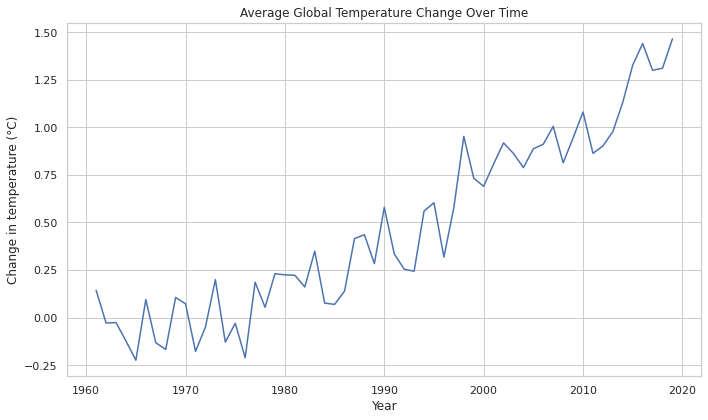

In [8]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series, x='ds', y='y')
plt.xlabel("Year")
plt.ylabel("Change in temperature (°C)")
plt.title("Average Global Temperature Change Over Time")
plt.tight_layout()
plt.show()


# In-Sample Forecast

In [9]:
time_train = time_series.iloc[:44, :].copy()
time_test = time_series.iloc[44:, :].copy()

In [10]:
in_model = Prophet()
in_model.fit(time_train)

In [11]:
in_forecast = in_model.predict(time_test).loc[:, ['ds', 'yhat']]
in_forecast['ds'] = in_forecast['ds'].apply(lambda x: x.year)
in_forecast

,ds,yhat
0,2005,0.811445
1,2006,0.809412
2,2007,0.796941
3,2008,0.774077
4,2009,0.901351
5,2010,0.899318
6,2011,0.886848
7,2012,0.863983
8,2013,0.991258
9,2014,0.989224


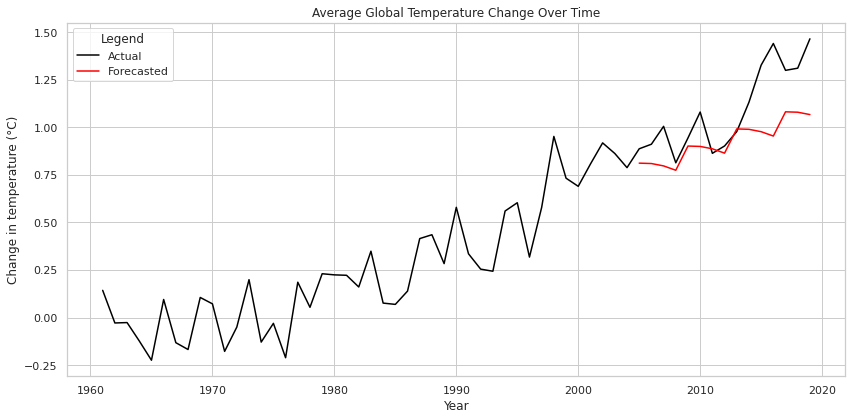

In [12]:
in_result_df = time_series.merge(in_forecast, on='ds', how='left')

df_melted = in_result_df.melt(id_vars='ds', value_vars=['y', 'yhat'], 
                              var_name='Type', value_name='Temperature Change')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='ds', y='Temperature Change', hue='Type', palette={'y': 'black', 'yhat': 'red'})

plt.xlabel("Year")
plt.ylabel("Change in temperature (°C)")
plt.title("Average Global Temperature Change Over Time")
plt.legend(title="Legend", labels=["Actual", "Forecasted"])

plt.tight_layout()
plt.show()


# Out-of-Sample Forecast

In [13]:
future_df = pd.DataFrame(np.arange(2020, 2046), columns=['ds'])
future_df

,ds
0,2020
1,2021
2,2022
3,2023
4,2024
5,2025
6,2026
7,2027
8,2028
9,2029


In [14]:
out_model = Prophet()
out_model.fit(time_series)

In [15]:
out_forecast = out_model.predict(future_df).loc[:, ['ds', 'yhat']]
out_forecast['ds'] = out_forecast['ds'].apply(lambda x: x.year)
out_forecast

,ds,yhat
0,2020,1.216573
1,2021,1.328136
2,2022,1.354637
3,2023,1.354043
4,2024,1.326387
5,2025,1.437950
6,2026,1.464451
7,2027,1.463857
8,2028,1.436201
9,2029,1.547764


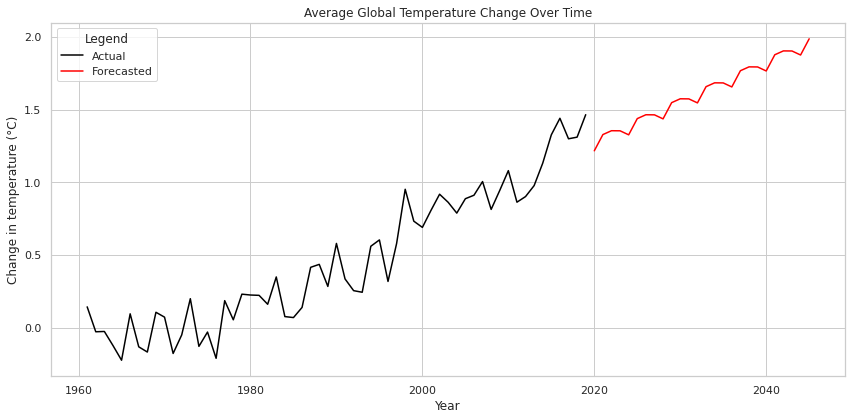

In [16]:
out_result_df = pd.concat([time_series, out_forecast], axis=0)

df_melted = out_result_df.melt(id_vars='ds', value_vars=['y', 'yhat'], 
                               var_name='Type', value_name='Temperature Change')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='ds', y='Temperature Change', hue='Type',
             palette={'y': 'black', 'yhat': 'red'})

plt.xlabel("Year")
plt.ylabel("Change in temperature (°C)")
plt.title("Average Global Temperature Change Over Time")
plt.legend(title="Legend", labels=["Actual", "Forecasted"])

plt.tight_layout()
plt.show()
